In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

print("Training images shape:", train_images.shape)   # (50000, 32, 32, 3)
print("Training labels shape:", train_labels.shape)   # (50000, 1)
print("Test images shape:", test_images.shape)         # (10000, 32, 32, 3)
print("Test labels shape:", test_labels.shape)         # (10000, 1)

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


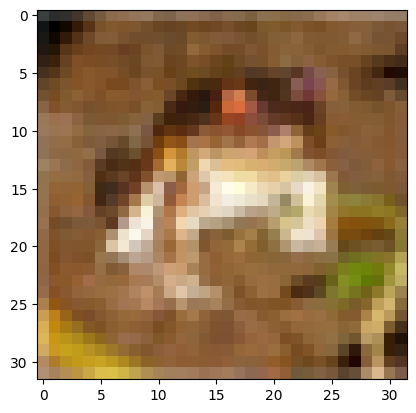

In [ ]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.show()

In [ ]:
train_labels[0]

array([6], dtype=uint8)

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),  # Randomly flip images horizontally
    tf.keras.layers.RandomRotation(0.1),      # Randomly rotate images by 10%
    tf.keras.layers.RandomZoom(0.1),          # Randomly zoom images
    tf.keras.layers.RandomTranslation(0.1, 0.1)  # Randomly translate images
])

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    data_augmentation,
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Flatten(),
    # dropout is usually added after the fully connected layers
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(units=10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_22 (Sequential)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_11 (Rescaling)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,146 (887.29 KB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

In [ ]:
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2375 - loss: 2.0112 - val_accuracy: 0.4299 - val_loss: 1.5783
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4098 - loss: 1.6028 - val_accuracy: 0.4606 - val_loss: 1.4981
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4495 - loss: 1.5053 - val_accuracy: 0.5008 - val_loss: 1.4267
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4818 - loss: 1.4423 - val_accuracy: 0.5006 - val_loss: 1.4474
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4981 - loss: 1.3964 - val_accuracy: 0.5683 - val_loss: 1.2045
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5137 - loss: 1.3539 - val_accuracy: 0.5817 - val_loss: 1.1767
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5282 - loss: 1.3318 - val_accuracy: 0.6024 - val_loss: 1.1228
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5351 - loss: 1.29

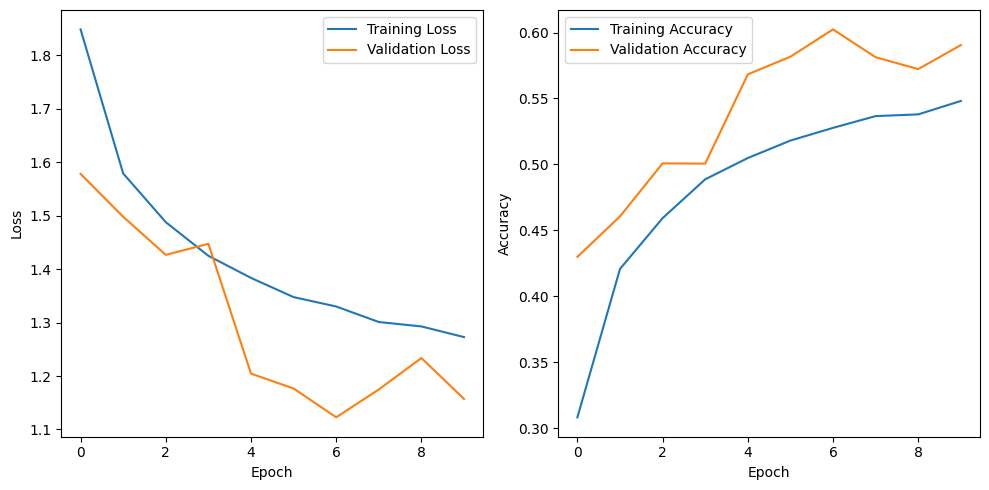

In [ ]:
# prompt: plot the loss and accuracy

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5945 - loss: 1.1272
Test accuracy: 0.5934000015258789
Test loss: 1.1319458484649658


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2516 - loss: 1.9711 - val_accuracy: 0.4328 - val_loss: 1.5695
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4366 - loss: 1.5280 - val_accuracy: 0.5150 - val_loss: 1.3291
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4841 - loss: 1.4069 - val_accuracy: 0.5470 - val_loss: 1.2501
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5230 - loss: 1.3275 - val_accuracy: 0.5659 - val_loss: 1.2087
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5412 - loss: 1.2785 - val_accuracy: 0.5632 - val_loss: 1.2007
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5550 - loss: 1.2364 - val_accuracy: 0.6026 - val_loss: 1.1231
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5664 - loss: 1.2114 - val_accuracy: 0.5917 - val_loss: 1.1284
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5790 - los

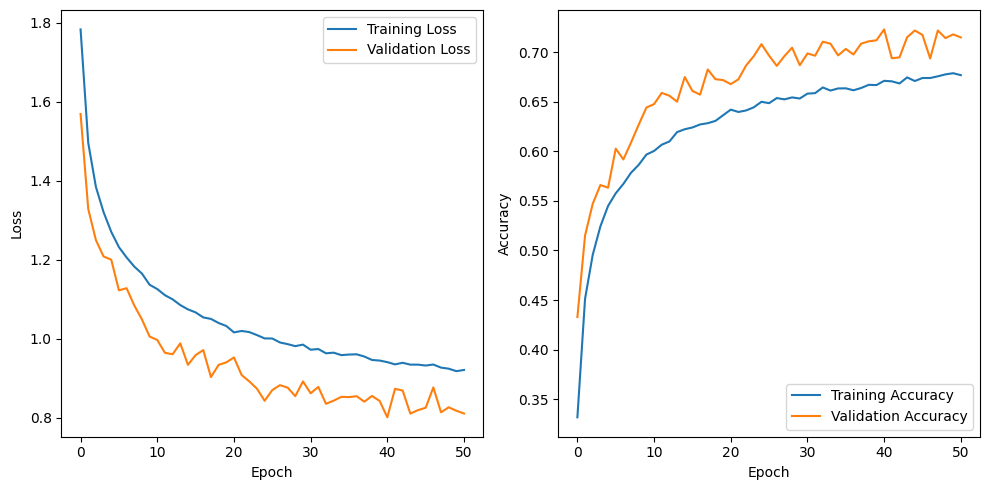

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7164 - loss: 0.8210
Test accuracy: 0.7153000235557556
Test loss: 0.8237237334251404


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Create data augmentation layer
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomZoom(0.1),
    keras.layers.RandomRotation(0.1),
])

model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    data_augmentation,  # Add data augmentation as first layer (only applied during training)
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')
]

history = model.fit(train_images, train_labels, epochs=100, validation_split=0.2, callbacks=callbacks)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2656 - loss: 1.9689 - val_accuracy: 0.4573 - val_loss: 1.4834
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4132 - loss: 1.6071 - val_accuracy: 0.4899 - val_loss: 1.3894
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4508 - loss: 1.5185 - val_accuracy: 0.5353 - val_loss: 1.2865
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4785 - loss: 1.4431 - val_accuracy: 0.5599 - val_loss: 1.2363
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5065 - loss: 1.3780 - val_accuracy: 0.5484 - val_loss: 1.2600
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5149 - loss: 1.3522 - val_accuracy: 0.5804 - val_loss: 1.1873
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5246 - loss: 1.3256 - val_accuracy: 0.5583 - val_loss: 1.2648
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5386 - los

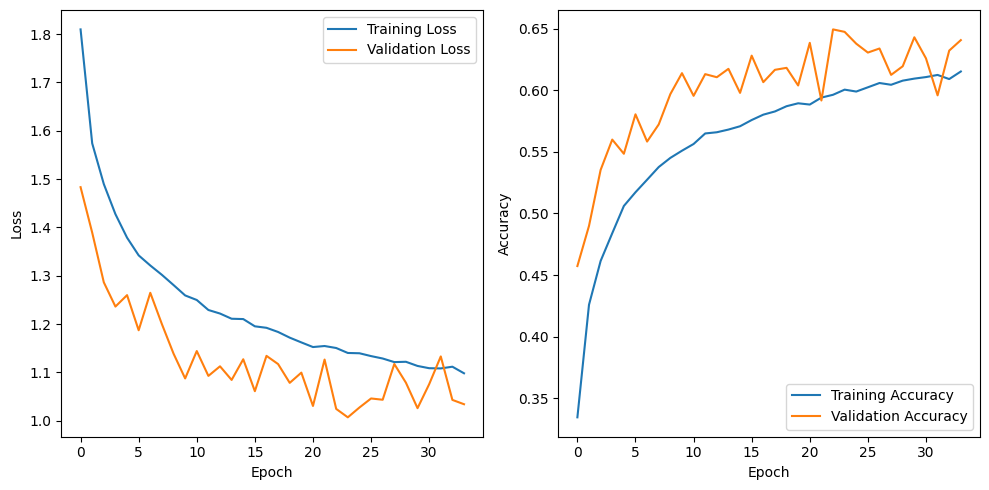

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6445 - loss: 1.0061
Test accuracy: 0.6462000012397766
Test loss: 1.0088222026824951


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Create data augmentation layer
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomZoom(0.1),
    keras.layers.RandomRotation(0.1),
])

model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    data_augmentation,  # Add data augmentation as first layer (only applied during training)
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')
]

history = model.fit(train_images, train_labels, epochs=100, validation_split=0.2, callbacks=callbacks)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

## Data Augmentation on the Flowers Dataset
The TF Flowers dataset is a popular image classification dataset provided by TensorFlow Datasets (tfds). It contains images of flowers belonging to different categories, making it well-suited for image classification and computer vision tasks. Here's an overview of the dataset:

Categories: The dataset consists of 5 classes of flowers:
Daisy
Dandelion
Roses
Sunflowers
Tulips

The dataset contains 3,670 images in total, distributed across the 5 classes.

Images vary in resolution and aspect ratio. Preprocessing steps like resizing are commonly applied to make them consistent.

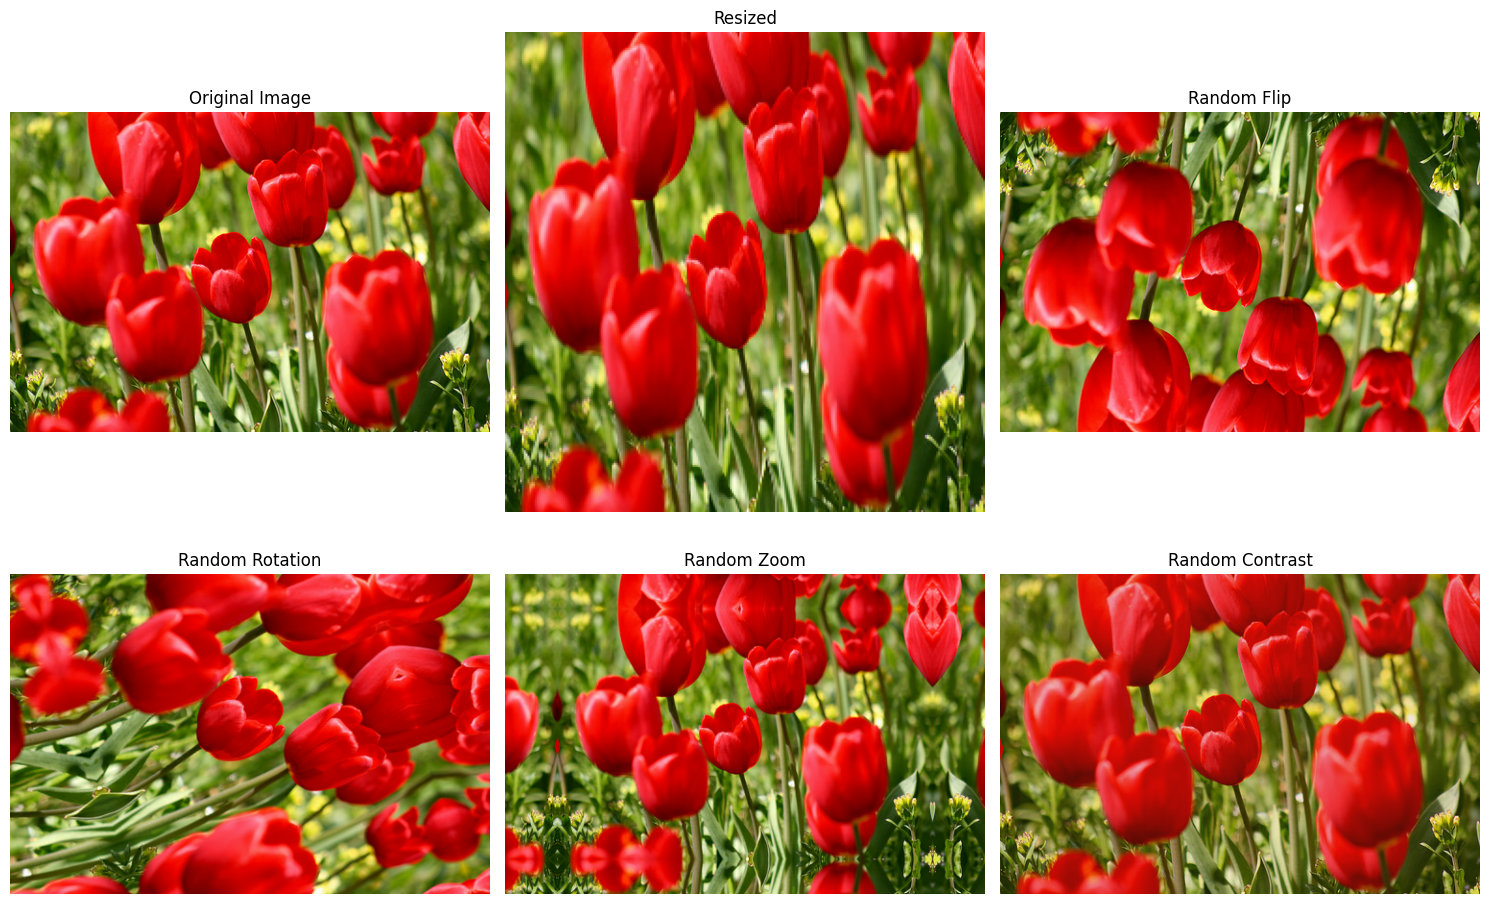

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the TF Flowers dataset
(ds, _), metadata = tfds.load(
    'tf_flowers',
    split=['train[:1%]', 'train[1%:]'],
    with_info=True,
    as_supervised=True,
)

# Take a single image and label from the dataset
example_image, example_label = next(iter(ds.take(1)))

# Define individual augmentation layers
resize = layers.Resizing(256, 256)
random_flip = layers.RandomFlip("horizontal_and_vertical")
random_rotation = layers.RandomRotation(0.2)
random_zoom = layers.RandomZoom(0.5)
random_contrast = layers.RandomContrast(0.2)

# Apply transformations step-by-step
transformations = [
    ("Original Image", lambda img: img),
    ("Resized", lambda img: resize(img)),
    ("Random Flip", lambda img: random_flip(img)),
    ("Random Rotation", lambda img: random_rotation(img)),
    ("Random Zoom", lambda img: random_zoom(img)),
    ("Random Contrast", lambda img: random_contrast(img)),
]

# Visualize the transformations
plt.figure(figsize=(15, 10))
for i, (title, transform) in enumerate(transformations, start=1):
    transformed_image = transform(example_image)
    plt.subplot(2, 3, i)
    plt.imshow(tf.cast(transformed_image, tf.uint8))
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# Import the flowers dataset
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

# Load dataset
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

num_classes = metadata.features['label'].num_classes
print(f"Number of classes: {num_classes}")

Number of classes: 5


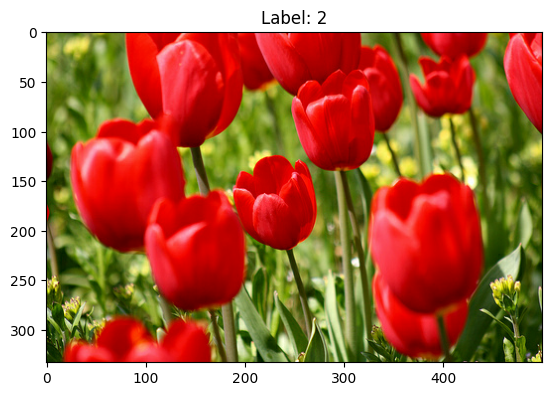

In [ ]:
example_image, example_label = next(iter(train_ds.take(1)))

plt.imshow(example_image)
plt.title(f"Label: {example_label}")
plt.show()

In [ ]:
# show some examples of augmenting this image
import numpy as np

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_images = data_augmentation(tf.expand_dims(image, 0))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(int(label))
    plt.show()

ValueError: Exception encountered when calling RandomRotation.call().

[1mInvalid images rank: expected rank 3 (single image) or rank 4 (batch of images). Received input with shape: images.shape=(1, 1, 2000, 3000, 3)[0m

Arguments received by RandomRotation.call():
  • inputs=tf.Tensor(shape=(1, 1, 2000, 3000, 3), dtype=float32)
  • training=True

<Figure size 1000x1000 with 0 Axes>

Number of classes: 5
Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 63s 470ms/step - accuracy: 0.3010 - loss: 2.3798 - val_accuracy: 0.4523 - val_loss: 1.2166
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 48s 369ms/step - accuracy: 0.4827 - loss: 1.2466 - val_accuracy: 0.5695 - val_loss: 1.1284
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 360ms/step - accuracy: 0.5379 - loss: 1.1302 - val_accuracy: 0.6267 - val_loss: 0.9779
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 83s 362ms/step - accuracy: 0.5765 - loss: 1.0262 - val_accuracy: 0.6349 - val_loss: 0.9270
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 48s 368ms/step - accuracy: 0.6180 - loss: 0.9713 - val_accuracy: 0.6894 - val_loss: 0.8363
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 361ms/step - accuracy: 0.6519 - loss: 0.8920 - val_accuracy: 0.6839 - val_loss: 0.8617
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 48s 375ms/step - accuracy: 0.6672 - loss: 0.9010 - val_accuracy: 0.6839 - val_loss: 0.8180
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 46s 358ms/step - accuracy: 0.6698 - lo

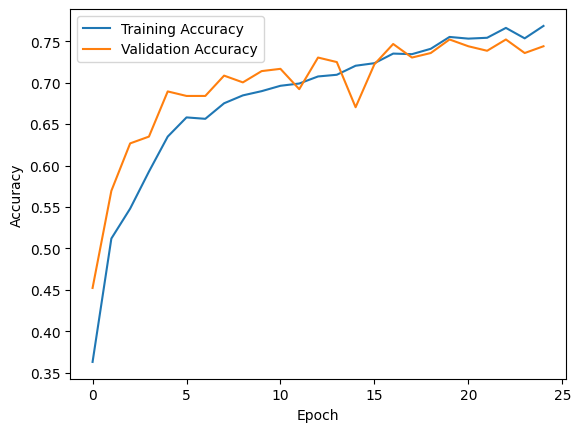

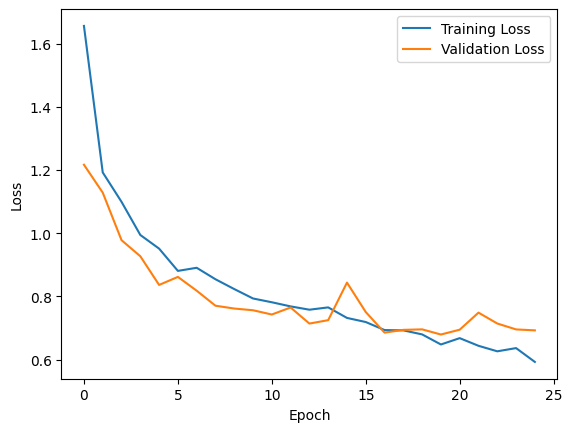

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7589 - loss: 0.6440
Test accuracy: 0.7711171507835388
Test loss: 0.6322166919708252


In [ ]:
# Define the data augmentation layers
data_augmentation = keras.Sequential([
    layers.Resizing(256, 256),  # Resize to 256x256
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Rescaling(1.0 / 255.0)  # Normalize to [0, 1]
])

# Function to apply augmentation
# Note: Sequential layers apply augmentation directly

def augment(image, label):
    return data_augmentation(image), label

# Preprocessing for validation and test datasets
def preprocess(image, label):
    image = tf.image.resize(image, [256, 256])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Dataset preparation
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(augment, num_parallel_calls=AUTOTUNE)
train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)

val_ds = val_ds.map(preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_ds = test_ds.map(preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Model definition
model = keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss")
    ]
)

# Plot training and validation metrics
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)
